In [94]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [95]:
diab = pd.read_csv('D:\Projects\Diabetes prediction\diabetes.csv')

In [96]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [97]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [99]:
diab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [100]:
diab.shape

(768, 9)

In [101]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Univariant Analysis 

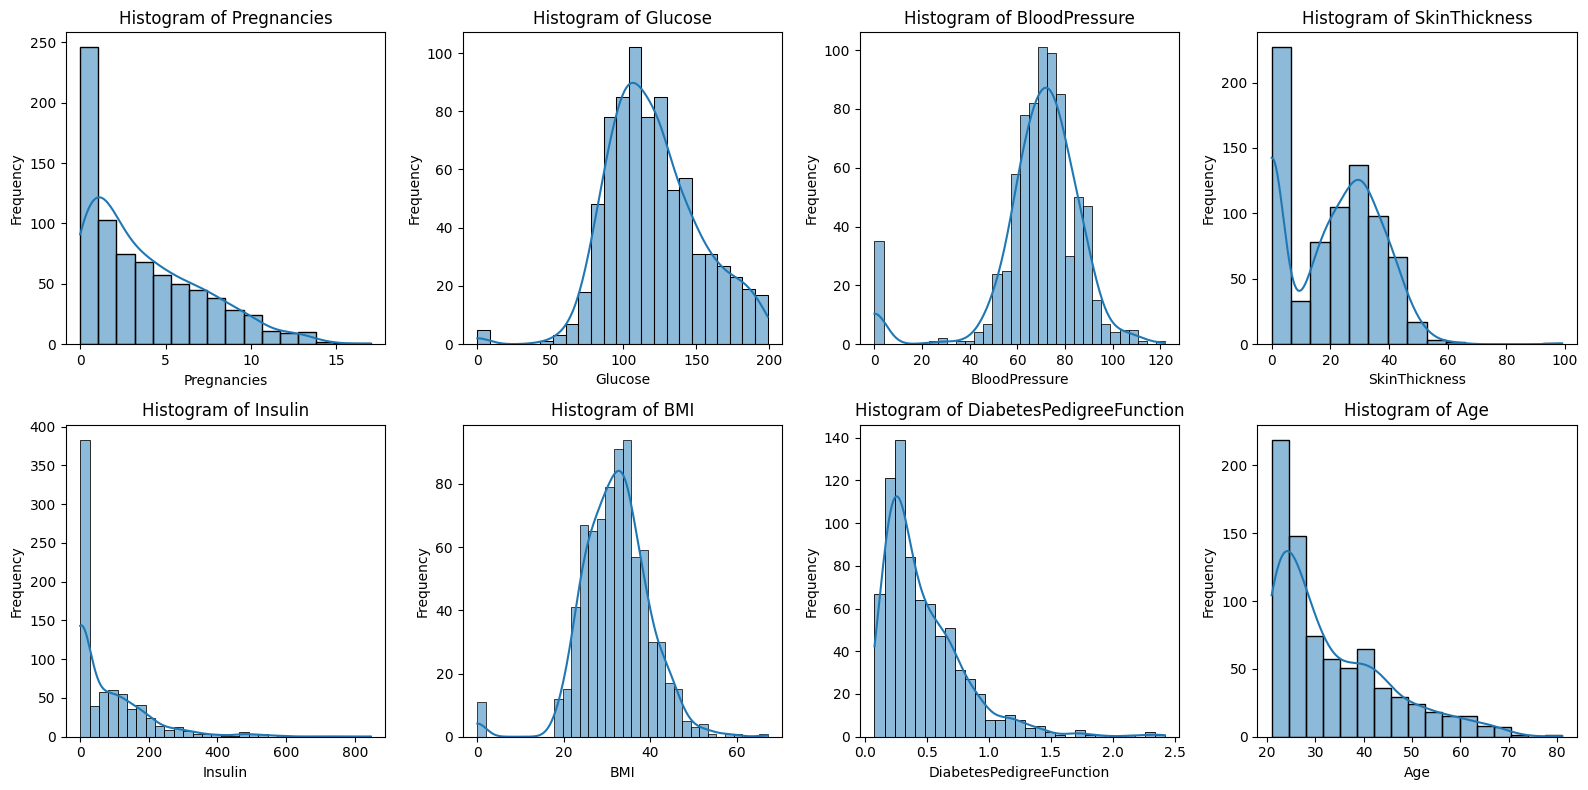

In [102]:
# Create subplots to display histograms for each column
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Column names
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(data=diab, x=col, kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogram of {col}')
    axes[i//4, i%4].set_xlabel(col)
    axes[i//4, i%4].set_ylabel('Frequency')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

looking at the graphs above we can see that the Blood pressure and BMI columns are the only columns with a normal frequency distribution 

## Bivariant Analysis

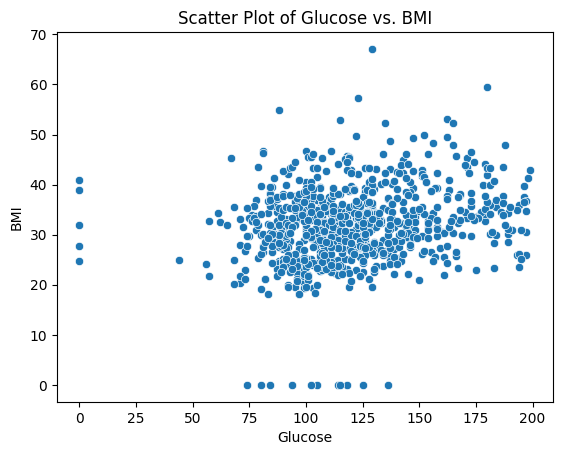

In [103]:
sns.scatterplot(data=diab, x='Glucose', y='BMI')
plt.title('Scatter Plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


we can see a positive correlation between the BMI and glucose level of the patients with outliers in the plot

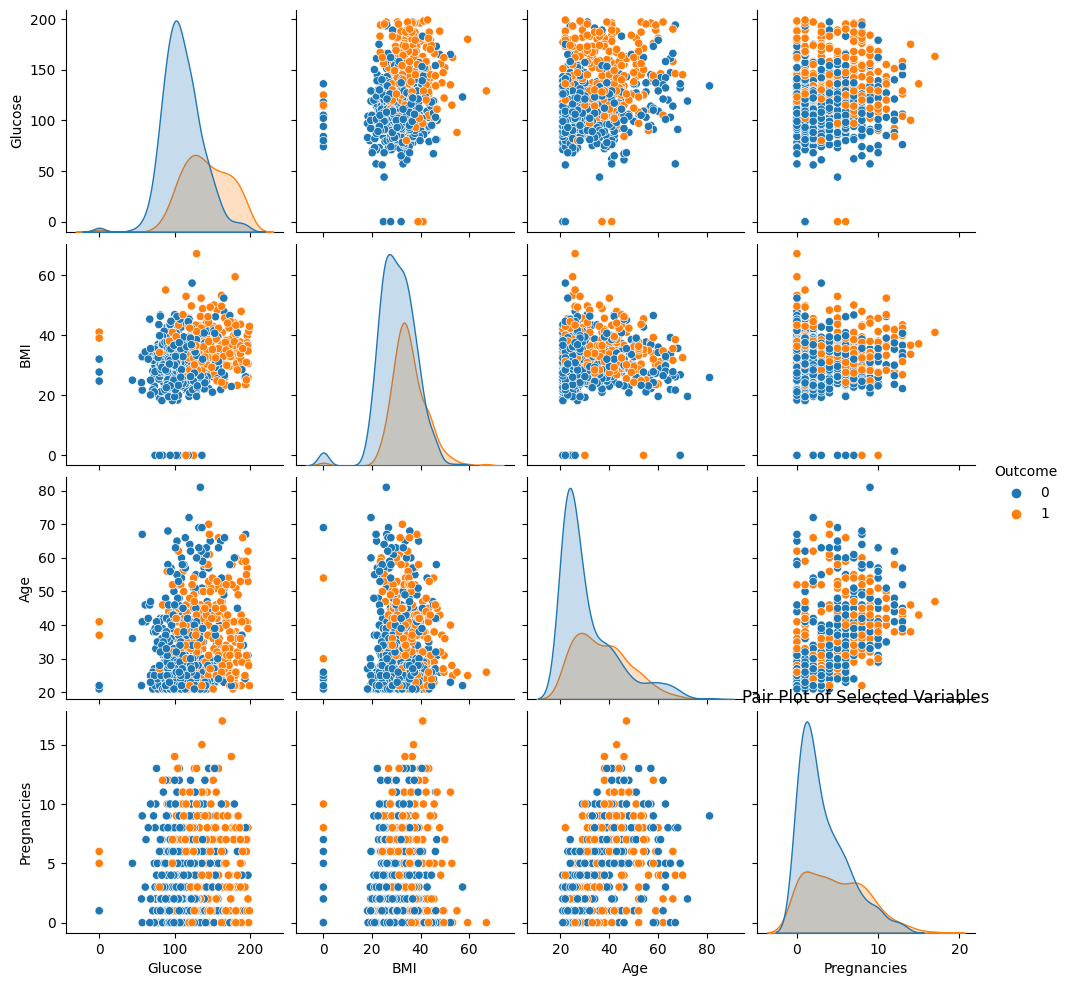

In [104]:
sns.pairplot(diab[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']], hue='Outcome')
plt.title('Pair Plot of Selected Variables')
plt.show()


In [105]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


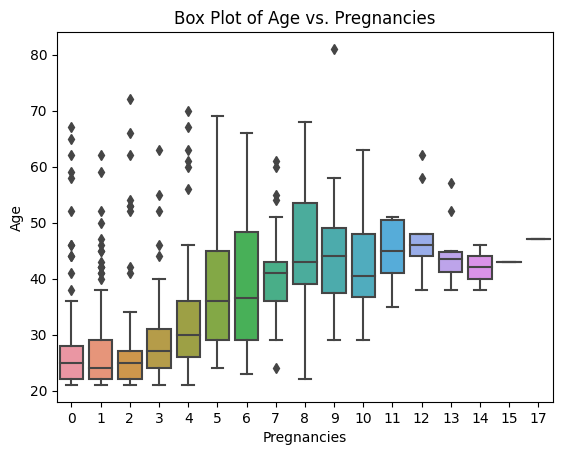

In [106]:
sns.boxplot(data=diab, x='Pregnancies', y='Age')
plt.title('Box Plot of Age vs. Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()


we can see that this two columns have alot of outliers 

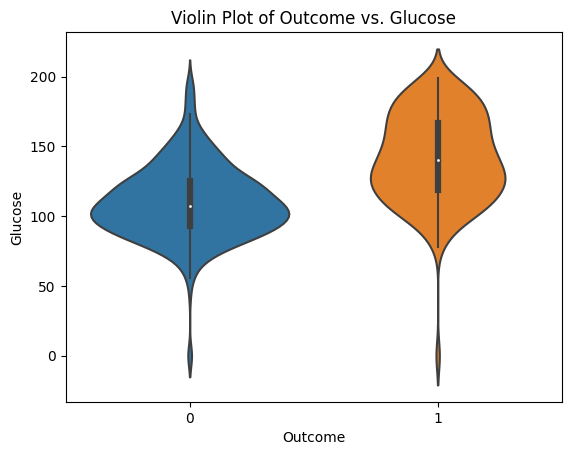

In [107]:
sns.violinplot(data=diab, x='Outcome', y='Glucose')
plt.title('Violin Plot of Outcome vs. Glucose')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()


## Multivariant Analysis

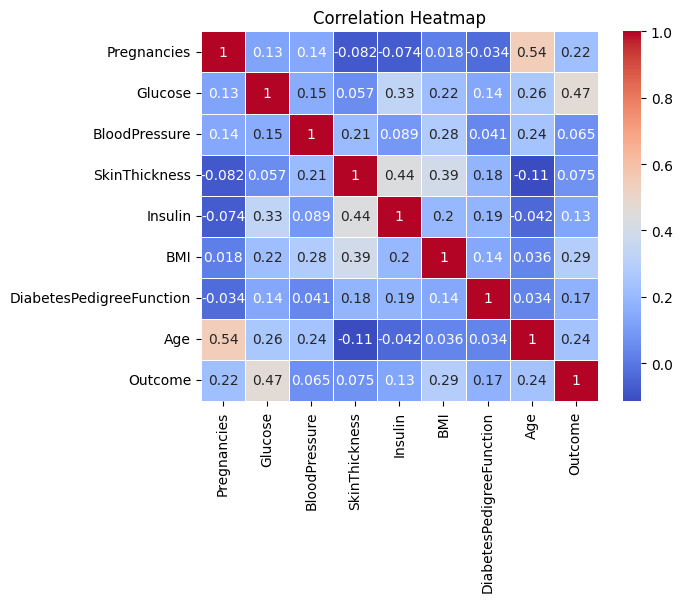

In [108]:
correlation_matrix = diab.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


shows theres a stron relationship between the 

# Feature Engineering

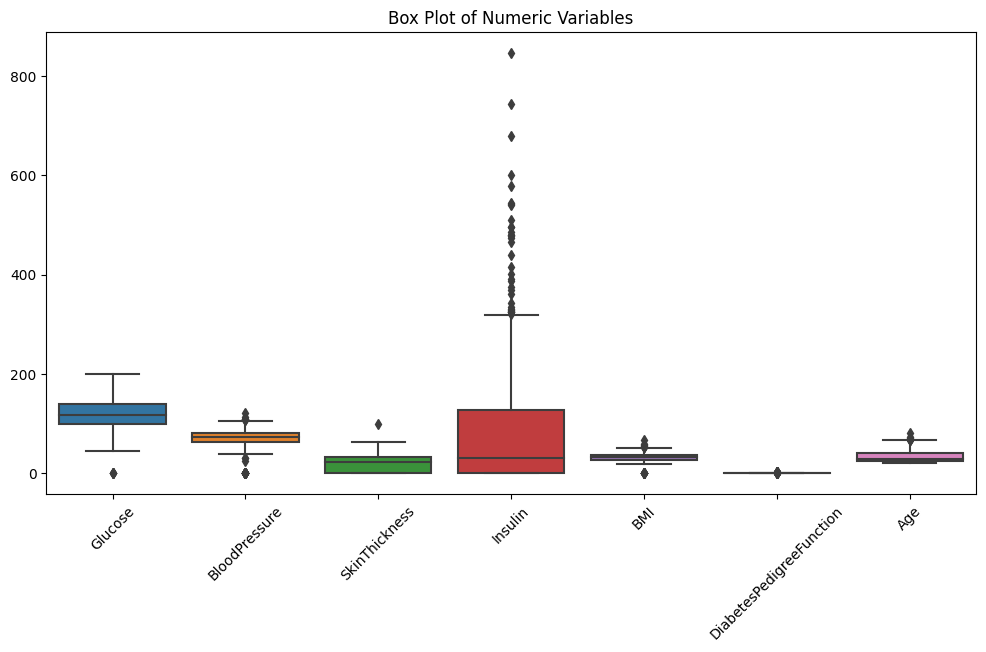

In [109]:
# checking for outliers and handling them
# Create box plots for numeric variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=diab[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title('Box Plot of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

dataset obviously has outliers 

In [110]:
# we would Remove outliers using IQR
Q1 = diab.quantile(0.25)
Q3 = diab.quantile(0.75)
IQR = Q3 - Q1
diab_no_outliers = diab[~((diab < (Q1 - 1.5 * IQR)) | (diab > (Q3 + 1.5 * IQR))).any(axis=1)]


In [111]:
# handling missing values 
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no missing values 

In [112]:
#checking for inbalnce in the dataset
class_counts = diab['Outcome'].value_counts()
class_counts


0    500
1    268
Name: Outcome, dtype: int64

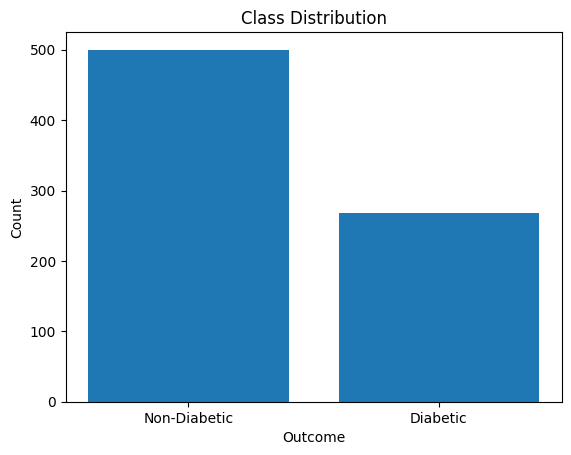

In [113]:
#visualizing the imbalance 
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Non-Diabetic', 'Diabetic'])
plt.show()


there is a class imbalance so we wont be balancing the dataset because we only have one variable which are females we would use a model that can predict without balancing the class 

In [114]:
diab.to_csv('scaled_dataset.csv', index=False)


In [119]:
#Feature Creation
# BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal Weight"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

diab['BMI_Category'] = diab['BMI'].apply(bmi_category)

#  Age Categories
def age_category(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 60:
        return "Adult"
    else:
        return "Elderly"

diab['Age_Category'] = diab['Age'].apply(age_category)


# Glucose-to-BMI Ratio
diab['Glucose_BMI_Ratio'] = diab['Glucose'] / diab['BMI']

#  Blood Pressure Categories
def blood_pressure_category(bp):
    if bp < 120:
        return "Normal"
    elif 120 <= bp < 130:
        return "Elevated"
    elif 130 <= bp < 140:
        return "Hypertension Stage 1"
    else:
        return "Hypertension Stage 2"

diab['BloodPressure_Category'] = diab['BloodPressure'].apply(blood_pressure_category)

#  Age-Glucose Interaction
diab['Age_Glucose_Interaction'] = diab['Age'] * diab['Glucose']




In [120]:
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Category,Glucose_BMI_Ratio,BloodPressure_Category,Age_Glucose_Interaction,Log_Glucose
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Adult,4.404762,Normal,7400,5.003946
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Adult,3.195489,Normal,2635,4.454347
2,8,183,64,0,0,23.3,0.672,32,1,Normal Weight,Adult,7.854077,Normal,5856,5.214936
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Young,3.167260,Normal,1869,4.499810
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Adult,3.178654,Normal,4521,4.927254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Obese,Elderly,3.069909,Normal,6363,4.624973
764,2,122,70,27,0,36.8,0.340,27,0,Obese,Young,3.315217,Normal,3294,4.812184
765,5,121,72,23,112,26.2,0.245,30,0,Overweight,Adult,4.618321,Normal,3630,4.804021
766,1,126,60,0,0,30.1,0.349,47,1,Obese,Adult,4.186047,Normal,5922,4.844187
